[Ref.: Hogg, Distance measures in cosmology](https://arxiv.org/abs/astro-ph/9905116)

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
# Distances in the Planck 2015 cosmology
from astropy.cosmology import FlatLambdaCDM
import numpy as np
import scipy.integrate as integrate

#TODO
def E_z(z, Or0, Om0, Ok0, Ol0):
    E = np.sqrt(Or0 * (1 + z)**4 + Om0 * (1 + z)**3 + Ok0 * (1 + z)**2 + Ol0 * (1 + z))
    return E

# The Planck 2015 cosmology.
H0 = 67.7 # km/s/Mpc
Om0 = 0.307
Ol0 = 1 - Om0
# Flat universe
Ok0 = 0
# Neglecting radiation density
Or0 = 0
# Speed of light in km/s
c = 299792.458 # km/s

# redshift range
z_array = np.logspace(-4, 4, 100)

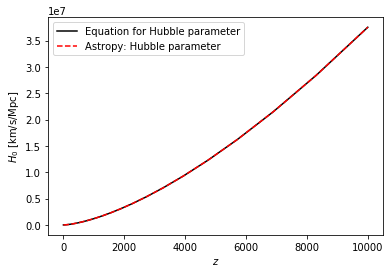

In [5]:
#TODO
H_z = H0*E_z(z_array, Or0, Om0, Ok0, Ol0)
cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)

plt.plot(z_array, H_z, label='Equation for Hubble parameter', color='k')
plt.plot(z_array, cosmo.H(z_array), label='Astropy: Hubble parameter', linestyle='--', color='red')
plt.ylabel(r'$H_0$ [km/s/Mpc]')
plt.xlabel(r'$z$')
plt.legend()
plt.show()

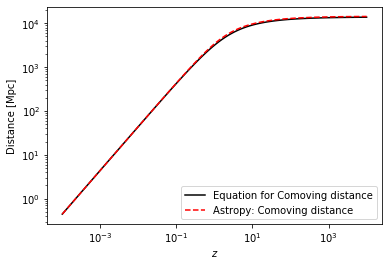

In [9]:
# Comoving distance

comov_z = np.zeros(len(z_array))
#TODO
dH = c/H0
#TODO
for i, z in enumerate(z_array):
    comov_z[i] = dH * integrate.quad(lambda z: 1/E_z(z, Or0, Om0, Ok0, Ol0) , 0, z)[0]

plt.plot(z_array, comov_z, color="k", label='Equation for Comoving distance')
plt.plot(z_array, cosmo.comoving_distance(z_array), linestyle='--', color='red', label='Astropy: Comoving distance')

plt.xlabel(r'$z$')
plt.ylabel('Distance [Mpc]')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

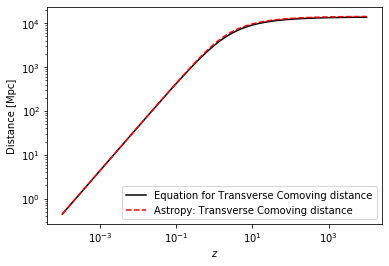

In [10]:
# Transversal Comoving distance
#TODO
if (Ok0 > 0):
    transcomov_z = dH / np.sqrt(Ok0) * np.sinh(np.sqrt(Ok0)*comov_z/dH)
elif (Ok0 < 0):
    transcomov_z = dH / np.sqrt(-Ok0) * np.sinh(np.sqrt(-Ok0)*comov_z/dH)
else:
    transcomov_z = comov_z

plt.plot(z_array, transcomov_z, color="k", label='Equation for Transverse Comoving distance')
plt.plot(z_array, cosmo.comoving_transverse_distance(z_array), linestyle='--', color='red', label='Astropy: Transverse Comoving distance')
plt.xlabel(r'$z$')
plt.ylabel('Distance [Mpc]')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

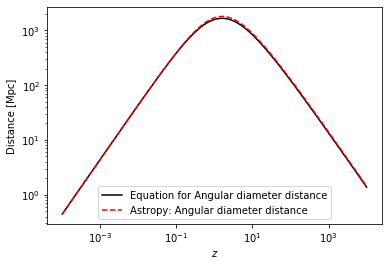

In [14]:
# Angular Diameter distance
#TODO
angdiam_z = transcomov_z / (1 + z_array)
dA = cosmo.angular_diameter_distance(z_array)

plt.plot(z_array, angdiam_z, color='k', label='Equation for Angular diameter distance')
plt.plot(z_array, dA, linestyle='--', color='red', label='Astropy: Angular diameter distance')
plt.xlabel(r'$z$')
plt.ylabel('Distance [Mpc]')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

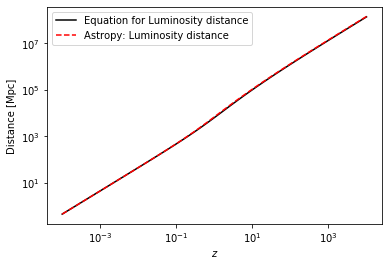

In [17]:
# Luminosity distance
#TODO
lumindist_z = (1 + z_array) * transcomov_z
dL = cosmo.luminosity_distance(z_array)

plt.plot(z_array, lumindist_z, color='k', label='Equation for Luminosity distance')
plt.plot(z_array, dL, linestyle='--', color='red', label='Astropy: Luminosity distance')
plt.xlabel(r'$z$')
plt.ylabel('Distance [Mpc]')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

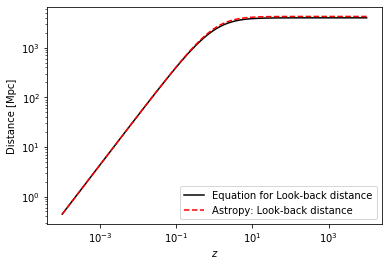

In [21]:
lookbackdist_z = np.zeros(len(z_array))
#TODO
for i, z in enumerate(z_array):
    lookbackdist_z[i] = dH * integrate.quad(lambda z: 1 / ((1 + z) * E_z(z, Or0, Om0, Ok0, Ol0)), 0, z)[0]
    
plt.plot(z_array, lookbackdist_z, color='k', label='Equation for Look-back distance')
plt.plot(z_array, cosmo.lookback_distance(z_array), linestyle='--', color='red', label='Astropy: Look-back distance')
plt.xlabel(r'$z$')
plt.ylabel('Distance [Mpc]')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

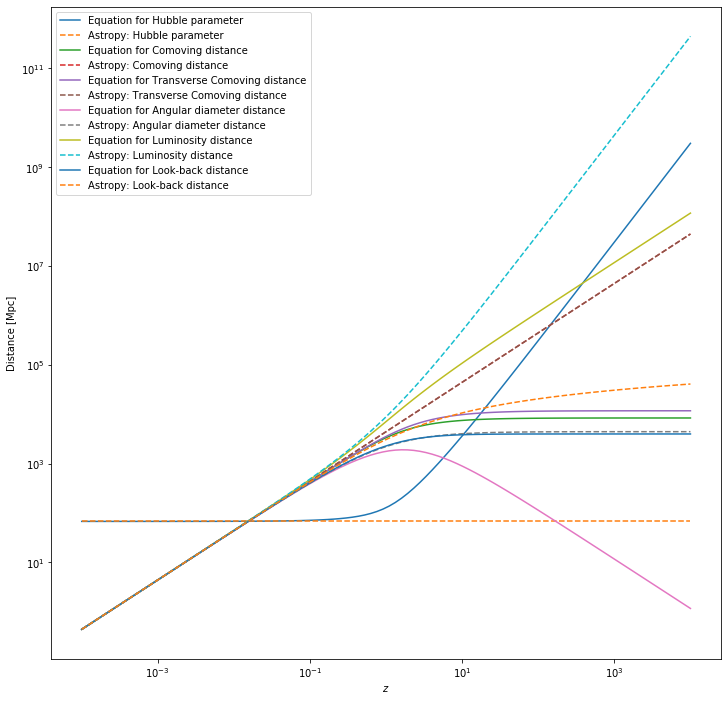

In [56]:
H0 = 67.7
Om0 = 0
Ok0 = -0.6
Or0 = 0.2
Ol0 = 1 - Om0 - Ok0 - Or0

H_z = H0*E_z(z_array, Or0, Om0, Ok0, Ol0)
cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)

dH = c/H0
comov_z = np.zeros(len(z_array))
for i, z in enumerate(z_array):
    comov_z[i] = dH * integrate.quad(lambda z: 1/E_z(z, Or0, Om0, Ok0, Ol0) , 0, z)[0]
    
if (Ok0 > 0):
    transcomov_z = dH / np.sqrt(Ok0) * np.sinh(np.sqrt(Ok0)*comov_z/dH)
elif (Ok0 < 0):
    transcomov_z = dH / np.sqrt(-Ok0) * np.sinh(np.sqrt(-Ok0)*comov_z/dH)
else:
    transcomov_z = comov_z
    
angdiam_z = transcomov_z / (1 + z_array)
dA = cosmo.angular_diameter_distance(z_array)

lumindist_z = (1 + z_array) * transcomov_z
dL = cosmo.luminosity_distance(z_array)

fig = plt.figure() 
ax = fig.add_subplot(111)

ax.plot(z_array, H_z, label='Equation for Hubble parameter')
ax.plot(z_array, cosmo.H(z_array), label='Astropy: Hubble parameter', linestyle='--')

ax.plot(z_array, comov_z, label='Equation for Comoving distance')
ax.plot(z_array, cosmo.comoving_distance(z_array), linestyle='--', label='Astropy: Comoving distance')

ax.plot(z_array, transcomov_z, label='Equation for Transverse Comoving distance')
ax.plot(z_array, cosmo.comoving_transverse_distance(z_array), linestyle='--', label='Astropy: Transverse Comoving distance')

ax.plot(z_array, angdiam_z, label='Equation for Angular diameter distance')
ax.plot(z_array, dA, linestyle='--', label='Astropy: Angular diameter distance')

ax.plot(z_array, lumindist_z, label='Equation for Luminosity distance')
ax.plot(z_array, dL, linestyle='--', label='Astropy: Luminosity distance')

ax.plot(z_array, lookbackdist_z, label='Equation for Look-back distance')
ax.plot(z_array, cosmo.lookback_distance(z_array), linestyle='--', label='Astropy: Look-back distance')

ax.set_xlabel(r'$z$')
ax.set_ylabel('Distance [Mpc]')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

fig.set_size_inches(12,12)

In the previous cases, the equation of state for the dark energy was considered to be:
$$p=-\rho c^2,$$ where $p$ is the pressure, $\rho$ is the density and $c$ is the speed of light.
However, a more general equation can be imagined:
$$p=w\rho c^2.$$
This model is entitled $w$CDM. For this model, the Hubble parameter has the following form: 

$$
H(z) \equiv H_0 E(z) = H_0 \sqrt{ \Omega_{\rm r} (1+z)^4 + \Omega_{\rm m} (1+z)^3 + \Omega_k (1+z)^2 + \Omega_\mathrm{DE} (1+z)^{3(1+w)} } \, .
$$
One can see that for $w=-1$, the formula used before is recovered.

In [ ]:
from astropy.cosmology import FlatwCDM
import scipy.integrate as integrate
import numpy as np

#TODO
def E_z(z, Or0, Om0, Ok0, ODE0, w):
    E = ...
    return E
#TODO
def comoving_distance(z_array, Or0=0, Om0=0.3, Ok0=0, ODE0=0.7, w=-1):
    comov_z = np.zeros(len(z_array))
    dH = ...
    for i, z in enumerate(z_array):
        comov_z[i] = ... integrate.quad(lambda z: ... , 0, z)[0]
    return comov_z    

# The Planck 2015 cosmology.
H0 = 67.7 # km/s/Mpc
# Flat universe
Ok0 = 0
# Neglecting radiation density
Or0 = 0
# Speed of light in km/s
c = 299792.458 # km/s

In [ ]:
# "Standardisable candle": Luminosity distances
OmegaDE = [0.693, 0.8, 0.6]
w0 = [-1.0, -1.1, -0.9]

z_array = np.linspace(0, 2, 20)

for ODE in OmegaDE:
    for w in w0:
        cosmo = FlatwCDM(H0=H0, Om0=1.0-ODE, w0=w)
        dL = cosmo.luminosity_distance(z_array)
        #TODO
        dL_form = ...
        
        plt.plot(z_array, dL, label=r'$\Omega_\Lambda = {0:g}, w = {1:g}$'.format(ODE,w))
        plt.plot(z_array, dL_form, ls='--')

plt.xlabel(r'$z$')
plt.ylabel('Luminosity distance [Mpc]')
plt.legend()
plt.show()

In [ ]:
# "Standard ruler": Angular diameter distances
OmegaDE = [0.693, 0.8, 0.6]
w0 = [-1.0, -1.1, -0.9]
z = np.linspace(0, 2, 20)

for ODE in OmegaDE:
    for w in w0:
        cosmo = FlatwCDM(H0=67.7, Om0=1.0-ODE, w0=w)
        dA = cosmo.angular_diameter_distance(z)
        #TODO
        dA_form = ...
        plt.plot(z, dA, label=r'$\Omega_\Lambda = {0:g}, w = {1:g}$'.format(ODE,w))
        plt.plot(z, dA_form, ls='--')

plt.xlabel(r'$z$')
plt.ylabel('Angular diameter distance [Mpc]')
plt.legend(loc='upper left')
plt.show()